# 生成华大版本的bgef

In [2]:
%%writefile gem2gef_bgi_bug.py
from gefpy import bgef_writer_cy
bgef_writer_cy.generate_bgef(
    input_file = "out/Y00855N1.tissue.gem.gz",
    bgef_file = "out/Y00855N1_bgi.bgef",
    bin_sizes = [1],
)

Overwriting gem2gef_bgi_bug.py


上述代码会报错
> (st) PS D:\Rust\geftools_rs> & E:/Anaconda_envs/envs/st/python.exe d:/Rust/geftools_rs/gem2gef_bgi_bug.py \
geneID  x       y       MIDCount        ExonCount\
 5\
create bgef file: out/Y00855N1_bgi.bgef\
can not find sn info from input file out/Y00855N1.tissue.gem.gz\
bin 1 matrix: min_x=0 len_x=-2147483648 min_y=0 len_y=-2147483648 matrix_len=0

In [3]:
%%writefile gem2gef_bgi_bug.py
from gefpy import bgef_writer_cy
bgef_writer_cy.generate_bgef(
    input_file = "out/test10000.gem.gz",
    bgef_file = "out/test10000_bgi.bgef",
    bin_sizes = [1],
)

Overwriting gem2gef_bgi_bug.py


In [7]:
import os
import h5py
import numpy as np
display(os.getcwd())

def print_structure(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"[Group] {name}")
    elif isinstance(obj, h5py.Dataset):
        print(f"[Dataset] {name}  shape={obj.shape}  dtype={obj.dtype}")

path = "out/test10000_bgi.bgef"
with h5py.File(path, "r") as f:
    f.visititems(print_structure)

    print("\nRoot attributes:")
    for k, v in f.attrs.items():
        # bytes → 字符串
        if isinstance(v, bytes):
            v = v.decode()
        # numpy 标量 → 提取值但保留 dtype
        if isinstance(v, np.generic):
            print(f"  {k}: {v.item()} (dtype={v.dtype})")
        else:
            print(f"  {k}: {v} (type={type(v).__name__})")

'd:\\Rust\\geftools_rs'

[Group] geneExp
[Group] geneExp/bin1
[Dataset] geneExp/bin1/exon  shape=(8325,)  dtype=uint16
[Dataset] geneExp/bin1/expression  shape=(8325,)  dtype=[('x', '<i4'), ('y', '<i4'), ('count', '<u2')]
[Dataset] geneExp/bin1/gene  shape=(3051,)  dtype=[('geneID', 'S64'), ('geneName', 'S64'), ('offset', '<u4'), ('count', '<u4')]
[Group] stat
[Dataset] stat/gene  shape=(3051,)  dtype=[('geneID', 'S64'), ('geneName', 'S64'), ('MIDcount', '<u4'), ('E10', '<f4')]
[Group] wholeExp
[Dataset] wholeExp/bin1  shape=(21270, 21263)  dtype=[('MIDcount', '<u4'), ('genecount', '<u2')]
[Group] wholeExpExon
[Dataset] wholeExpExon/bin1  shape=(21270, 21263)  dtype=uint32

Root attributes:
  bin_type: [b'Bin'] (type=ndarray)
  gef_area: [0.] (type=ndarray)
  geftool_ver: [ 1  1 20] (type=ndarray)
  omics: [b'Transcriptomics'] (type=ndarray)
  version: [4] (type=ndarray)


In [18]:
# 代码示例
import h5py
import numpy as np

path = "out/test10000_bgi.bgef"
with h5py.File(path, "r") as f:
    h5path = "wholeExp/bin1"

    # 输出属性
    print(">>>Attribute:")
    for k, v in f[h5path].attrs.items():
        # 一些属性是 bytes，需要手动 decode
        if isinstance(v, bytes):
            v = v.decode()
        print(f"{k}: {v}, {v.dtype}")
    
    # 数据矩阵
    print(">>>Dataset:")
    expr = np.array(f[h5path]) # 替换这里f的键值即可
    print(expr.shape, expr)

>>>Attribute:
lenX: [21270], uint32
lenY: [21263], uint32
maxGene: [1563], uint32
maxMID: [11614478], uint32
minX: [0], uint32
minY: [0], uint32
number: [4862], uint64
resolution: [0], uint32
>>>Dataset:
(21270, 21263) [[( 5445794,  478) (       0,    0) (       0,    0) ... (       0,    0)
  (       0,    0) (       0,    0)]
 [(11614478, 1563) (       0, 1113) (       0,    0) ... (       0,    0)
  (       0,    0) (       0,    0)]
 [(  735388,   95) (       0,    2) (       0,   68) ... (       0,    0)
  (       0,    0) (       0,    0)]
 ...
 [(       0,    0) (       0,    0) (       0,    0) ... (       0,    0)
  (       0,    0) (       0,    0)]
 [(       0,    0) (       0,    0) (       0,    0) ... (       0,    0)
  (       0,    0) (       0,    0)]
 [(       0,    0) (       0,    0) (       0,    1) ... (       0,    0)
  (       0,    0) (       0,    0)]]


# 查看输出hdf5数据结构

> $env:HDF5_DIR="$env:CONDA_PREFIX\Library"\
> $env:HDF5_LIBDIR="$env:HDF5_DIR\lib"\
> $env:HDF5_INCLUDE="$env:HDF5_DIR\include"\
> $env:PATH="$env:HDF5_DIR\bin;$env:PATH"

In [49]:
# 命令行执行
!cargo build --release

   Compiling gem2gef v0.1.0 (D:\Rust\geftools_rs)
    Finished `release` profile [optimized] target(s) in 1.59s


In [50]:
!target\release\gem2gef.exe -i out\Y00855N1.tissue.gem.gz -o out\Y00855N1.bgef

Processed   10000000 lines...
Processed   20000000 lines...
Processed   30000000 lines...
Processed   40000000 lines...
Processed   50000000 lines...
Processed   60000000 lines...
Processed   70000000 lines...
Processed   80000000 lines...
Processed   90000000 lines...
Processed  100000000 lines...
Processed  110000000 lines...
Processed  120000000 lines...
Processed  130000000 lines...
Processed  140000000 lines...
Processed  150000000 lines...
Processed all lines:  153549866 
wrote out\Y00855N1.bgef!


[2025-11-04 20:25:53.293 +08:00] Header info:
  BinType=Bin  BinSize=1
  Omics=Transcriptomics  Chip=Y00855N1
  Offset=(0, 0)  HasExon=true  HeaderLineIndex=8
[2025-11-04 20:27:10.289 +08:00] /geneExp/bin1 info:
  minX=3767  maxX=21222
  minY=3330  maxY=21383
  maxExp=24 maxExon=10 resolution=500
[2025-11-04 20:27:10.594 +08:00] /wholeExp/bin1 info:
  number=85019725
  minX=3767  minY=17456
  lenX=3330  lenY=18054
  maxMID=49  maxGene=47 resolution=500
[2025-11-04 20:27:10.594 +08:00] /wholeExpExon/bin1 info:
  maxExon=25


In [51]:
import os
import h5py
import numpy as np
display(os.getcwd())

def print_structure(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"[Group] {name}")
    elif isinstance(obj, h5py.Dataset):
        print(f"[Dataset] {name}  shape={obj.shape}  dtype={obj.dtype}")

path = "out/Y00855N1.bgef"
with h5py.File(path, "r") as f:
    f.visititems(print_structure)

    print("\nRoot attributes:")
    for k, v in f.attrs.items():
        # bytes → 字符串
        if isinstance(v, bytes):
            v = v.decode()
        # numpy 标量 → 提取值但保留 dtype
        if isinstance(v, np.generic):
            print(f"  {k}: {v.item()} (dtype={v.dtype})")
        else:
            print(f"  {k}: {v} (type={type(v).__name__})")

'd:\\Rust\\geftools_rs'

[Group] geneExp
[Group] geneExp/bin1
[Dataset] geneExp/bin1/exon  shape=(153549346,)  dtype=uint32
[Dataset] geneExp/bin1/expression  shape=(153549346,)  dtype=[('x', '<i4'), ('y', '<i4'), ('count', '<u4')]
[Dataset] geneExp/bin1/gene  shape=(40417,)  dtype=[('geneID', 'S64'), ('geneName', 'S64'), ('offset', '<u4'), ('count', '<u4')]
[Group] wholeExp
[Dataset] wholeExp/bin1  shape=(17456, 18054)  dtype={'names': ['MIDcount', 'genecount'], 'formats': ['<u4', '<u2'], 'offsets': [0, 4], 'itemsize': 8}
[Group] wholeExpExon
[Dataset] wholeExpExon/bin1  shape=(17456, 18054)  dtype=uint32

Root attributes:
  bin_type: Bin (type=str)
  gef_area: 0.0 (dtype=float32)
  geftool_ver: [ 1  1 20] (type=ndarray)
  omics: Transcriptomics (type=str)
  sn: Y00855N1 (type=str)
  version: 4 (dtype=uint32)


Y00855ND.tissue.gem.gz文件总行数是123196419

In [52]:
# 代码示例
import h5py
import numpy as np
path = "out/test.bgef"
path = "out/Y00855N1.bgef"
with h5py.File(path, "r") as f:
    h5path = "wholeExp/bin1"

    # 输出属性
    print(">>>Attribute:")
    for k, v in f[h5path].attrs.items():
        # 一些属性是 bytes，需要手动 decode
        if isinstance(v, bytes):
            v = v.decode()
        print(f"{k}: {v}, {v.dtype}")
    
    # 数据矩阵
    print(">>>Dataset:")
    expr = np.array(f[h5path]) # 替换这里f的键值即可
    print(expr.shape, expr)

>>>Attribute:
lenX: 17456, int32
lenY: 18054, int32
maxExon: 25, uint32
maxGene: 47, uint32
maxMID: 49, uint32
minX: 3767, int32
minY: 3330, int32
number: 85019725, uint64
resolution: 500, uint32
>>>Dataset:
(17456, 18054) [[(0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)]
 [(0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)]
 [(0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)]
 ...
 [(0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)]
 [(0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)]
 [(0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)]]


In [53]:
# 代码示例
import h5py
import numpy as np
path = "out/Y00855N1.bgef"
with h5py.File(path, "r") as f:
    h5path = "/geneExp/bin1/expression"

    # 输出属性
    print(">>>Attribute:")
    for k, v in f[h5path].attrs.items():
        # 一些属性是 bytes，需要手动 decode
        if isinstance(v, bytes):
            v = v.decode()
        print(f"{k}: {v}, {v.dtype}")
    
    # 数据矩阵
    print(">>>Dataset:")
    expr = np.array(f[h5path]) # 替换这里f的键值即可
    print(expr.shape, expr)

>>>Attribute:
maxExp: 24, uint32
maxX: 21222, int32
maxY: 21383, int32
minX: 0, int32
minY: 0, int32
resolution: 500, uint32
>>>Dataset:
(153549346,) [( 3876,  9607, 1) ( 3889, 10307, 1) ( 3920, 10334, 1) ...
 (18557, 13328, 2) (20458, 14160, 1) ( 7164,  9619, 1)]


# 查看cgef结构

执行cellcut.py

In [47]:
import os
import h5py
import numpy as np
display(os.getcwd())

def print_structure(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"[Group] {name}")
    elif isinstance(obj, h5py.Dataset):
        print(f"[Dataset] {name}  shape={obj.shape}  dtype={obj.dtype}")

path = "out/Y00855N1.cellbin.gef"
with h5py.File(path, "r") as f:
    f.visititems(print_structure)

    print("\nRoot attributes:")
    for k, v in f.attrs.items():
        # bytes → 字符串
        if isinstance(v, bytes):
            v = v.decode()
        # numpy 标量 → 提取值但保留 dtype
        if isinstance(v, np.generic):
            print(f"  {k}: {v.item()} (dtype={v.dtype})")
        else:
            print(f"  {k}: {v} (type={type(v).__name__})")

'd:\\Rust\\geftools_rs'

[Group] cellBin
[Dataset] cellBin/blockIndex  shape=(4900,)  dtype=uint32
[Dataset] cellBin/blockSize  shape=(4,)  dtype=uint32
[Dataset] cellBin/cell  shape=(98651,)  dtype=[('id', '<u4'), ('x', '<i4'), ('y', '<i4'), ('offset', '<u4'), ('geneCount', '<u2'), ('expCount', '<u2'), ('dnbCount', '<u2'), ('area', '<u2'), ('cellTypeID', '<u2'), ('clusterID', '<u2')]
[Dataset] cellBin/cellBorder  shape=(98651, 32, 2)  dtype=int16
[Dataset] cellBin/cellExon  shape=(98651,)  dtype=uint16
[Dataset] cellBin/cellExp  shape=(18658002,)  dtype=[('geneID', '<u4'), ('count', '<u2')]
[Dataset] cellBin/cellExpExon  shape=(18658002,)  dtype=uint16
[Dataset] cellBin/cellTypeList  shape=(1,)  dtype=|S32
[Dataset] cellBin/gene  shape=(40417,)  dtype=[('geneID', 'S64'), ('geneName', 'S64'), ('offset', '<u4'), ('cellCount', '<u4'), ('expCount', '<u4'), ('maxMIDcount', '<u2')]
[Dataset] cellBin/geneExon  shape=(40417,)  dtype=uint32
[Dataset] cellBin/geneExp  shape=(18658002,)  dtype=[('cellID', '<u4'), ('coun

In [48]:
# 代码示例
import h5py
import numpy as np

path = "out/Y00855N1.cellbin.gef"
with h5py.File(path, "r") as f:
    h5path = "cellBin/cell"

    # 输出属性
    print(">>>Attribute:")
    for k, v in f[h5path].attrs.items():
        # 一些属性是 bytes，需要手动 decode
        if isinstance(v, bytes):
            v = v.decode()
        print(f"{k}: {v}, {v.dtype}")
    
    # 数据矩阵
    print(">>>Dataset:")
    expr = np.array(f[h5path]) # 替换这里f的键值即可
    print(expr.shape, expr)

>>>Attribute:
averageArea: [279.00952], float32
averageDnbCount: [113.68188], float32
averageExpCount: [221.69528], float32
averageGeneCount: [189.13141], float32
maxArea: [1971], uint16
maxDnbCount: [875], uint16
maxExpCount: [2221], uint16
maxGeneCount: [1557], uint16
maxX: [17422], int32
maxY: [18046], int32
medianArea: [259.], float32
medianDnbCount: [104.], float32
medianExpCount: [185.], float32
medianGeneCount: [164.], float32
minArea: [4], uint16
minDnbCount: [1], uint16
minExpCount: [1], uint16
minGeneCount: [1], uint16
minX: [3759], int32
minY: [3391], int32
>>>Dataset:
(98651,) [(    0,  9400,  3579,        0,  89,  99,  66, 668, 0, 0)
 (    1,  9722,  3536,       89, 244, 289, 175, 539, 0, 0)
 (    2,  9570,  3580,      333,   4,   4,   2,  20, 0, 0) ...
 (98648, 12051, 17922, 18656972, 279, 337, 178, 380, 0, 0)
 (98649, 12034, 17929, 18657251, 470, 594, 275, 517, 0, 0)
 (98650, 12393, 17925, 18657721, 281, 345, 172, 353, 0, 0)]


# 使用stereopy读取和显示

## 官方数据

In [33]:
import scanpy as sc
sc.read(r"C:\Users\William_Han\Downloads\IDBHT-HNHZ-0277\S-1\03.BasicResults\analysis\Y00855N1.cellbin_1.0.adjusted.h5ad")

Only considering the two last: ['.adjusted', '.h5ad'].
Only considering the two last: ['.adjusted', '.h5ad'].


AnnData object with n_obs × n_vars = 145384 × 41534
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y'
    var: 'real_gene_name', 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'hvg', 'key_record', 'leiden_resolution', 'merged', 'neighbors', 'omics', 'pca_variance_ratio', 'rank_genes_groups', 'resolution', 'result_keys', 'sn'
    obsm: 'X_pca', 'X_umap', 'cell_border', 'spatial'
    obsp: 'connectivities', 'distances'

## 读取为bin1

In [1]:
import sys
import os
import pandas as pd
from natsort import natsorted
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator
import warnings
warnings.filterwarnings('ignore')

data = st.io.read_gef(file_path="out/Y00855N1.bgef", 
                      bin_type='bins')
data

[2025-11-04 20:36:47][Stereo][22088][MainThread][9292][reader][1303][INFO]: read_gef begin ...
[2025-11-04 20:36:59][Stereo][22088][MainThread][9292][reader][1452][INFO]: the matrix has 21468 cells, and 40417 genes.
[2025-11-04 20:36:59][Stereo][22088][MainThread][9292][reader][1453][INFO]: read_gef end.


StereoExpData object with n_cells X n_genes = 21468 X 40417
bin_type: bins
bin_size: 100
offset_x = 0
offset_y = 0
cells: ['cell_name']
genes: ['gene_name', 'real_gene_name']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

[2025-11-04 19:29:37][Stereo][30200][MainThread][12052][st_pipeline][41][INFO]: start to run cal_qc...
[2025-11-04 19:29:38][Stereo][30200][MainThread][12052][st_pipeline][44][INFO]: cal_qc end, consume time 0.6427s.


BokehModel(combine_events=True, render_bundle={'docs_json': {'a35dcdbb-cd86-4c07-9df3-de38f30d2eab': {'defs': …

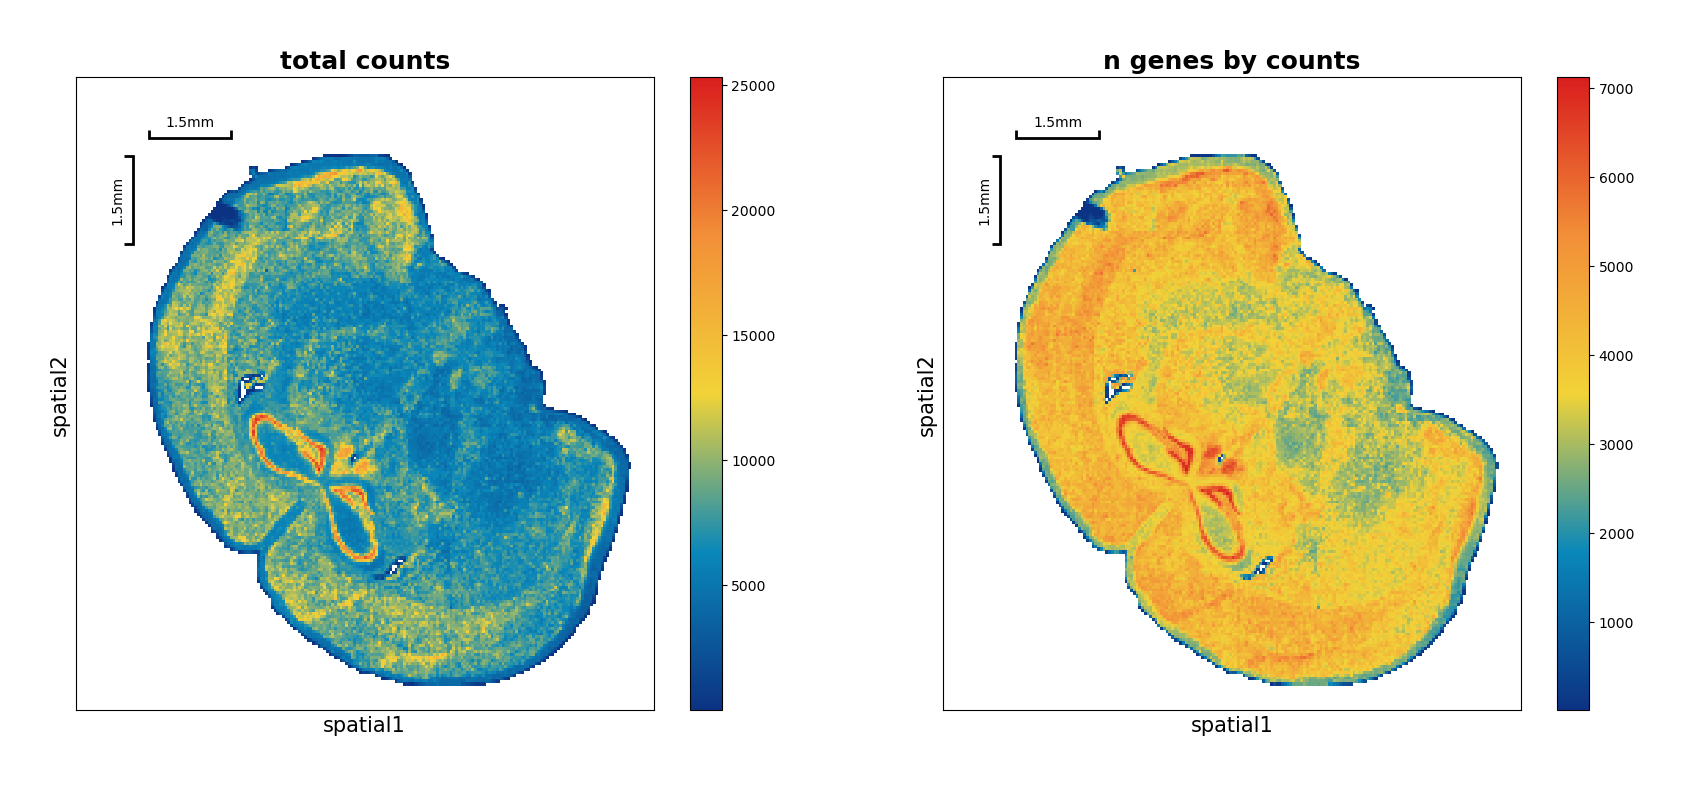

In [35]:
data.tl.cal_qc()
data.plt.spatial_scatter()

## 读取为cellbin

In [2]:
import sys
import os
import pandas as pd
from natsort import natsorted
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator
import warnings
warnings.filterwarnings('ignore')

data = st.io.read_gef(file_path="out/Y00855N1.cellbin.gef", 
                      bin_type='cell_bins')
data

[2025-11-04 20:39:17][Stereo][22088][MainThread][9292][reader][1303][INFO]: read_gef begin ...
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1518][INFO]: This is GEF file which contains cell bin infomation.
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1519][INFO]: bin_type: cell_bins
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1525][INFO]: Number of cells: 146346
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1528][INFO]: Number of gene: 40417
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1531][INFO]: Resolution: 500
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1534][INFO]: offsetX: 0
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1537][INFO]: offsetY: 0
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1540][INFO]: Average number of genes: 250.46981811523438
[2025-11-04 20:39:18][Stereo][22088][MainThread][9292][reader][1543][INFO]: Maximum number of ge

StereoExpData object with n_cells X n_genes = 146346 X 40417
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area']
genes: ['gene_name', 'real_gene_name']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []

[2025-11-04 20:39:19][Stereo][22088][MainThread][9292][st_pipeline][41][INFO]: start to run cal_qc...
[2025-11-04 20:39:19][Stereo][22088][MainThread][9292][st_pipeline][44][INFO]: cal_qc end, consume time 0.3446s.


BokehModel(combine_events=True, render_bundle={'docs_json': {'1868d949-f487-49a4-97e2-a423f3108645': {'defs': …

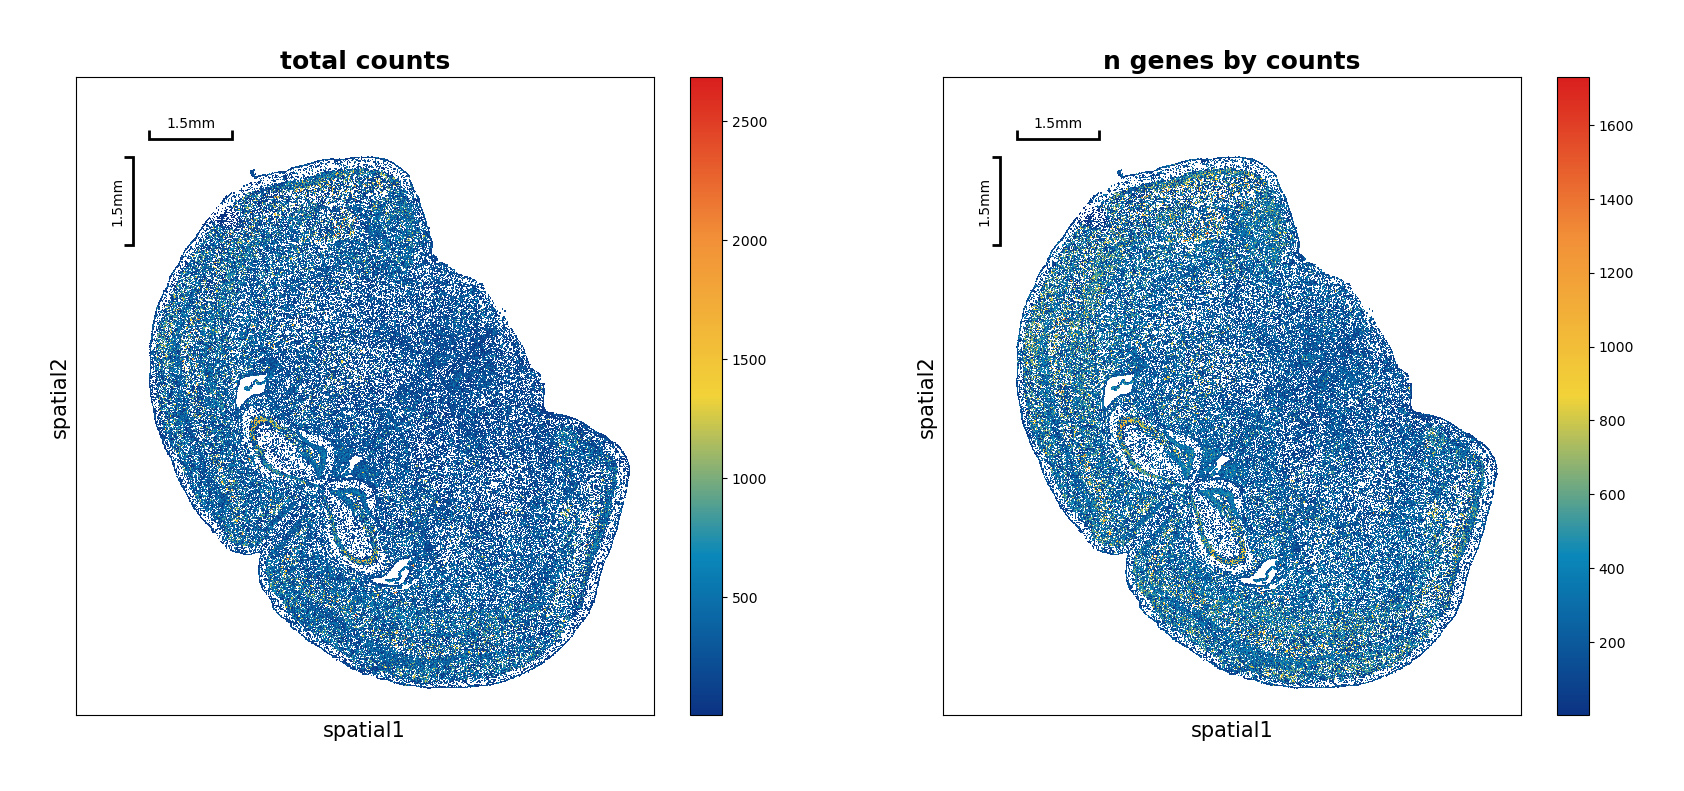

In [3]:
data.tl.cal_qc()
data.plt.spatial_scatter()

手动抽样前200000个点，然后模拟显示

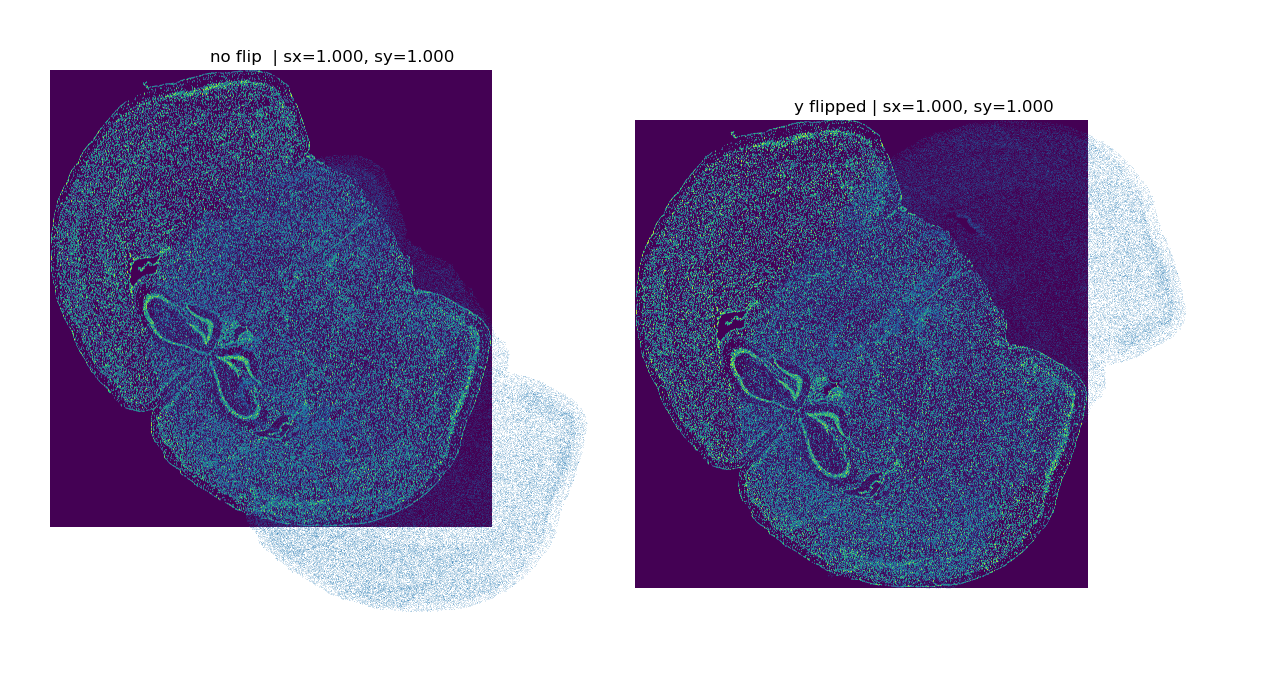

In [4]:
import h5py, numpy as np
from PIL import Image
import matplotlib.pyplot as plt

bgef = "out/Y00855N1.bgef"      # 你的 bGEF 路径
cgef = "out/Y00855N1.cellbin.gef"      # 你的 bGEF 路径
mask = "out/Y00855N1_ssDNA_regist_mask_roi_nocomp.tif"

with h5py.File(bgef, "r") as f:
    ds = f["geneExp/bin1/expression"]
    minX = int(ds.attrs["minX"]); maxX = int(ds.attrs["maxX"])
    minY = int(ds.attrs["minY"]); maxY = int(ds.attrs["maxY"])
    # 抽样（避免读爆内存）
    names = ds.dtype.names
    x = np.asarray(ds["x"][:200000], dtype=np.int32)  # 相对坐标（bin内）
    y = np.asarray(ds["y"][:200000], dtype=np.int32)

Image.MAX_IMAGE_PIXELS = None   # 解除安全上限
img = Image.open(mask)
W, H = img.size

lenX = maxX - minX + 1
lenY = maxY - minY + 1

# 估计每个bin对应多少像素（允许非整数）
sx = W / lenX
sy = H / lenY
s  = (sx + sy) / 2.0   # 取平均更鲁棒

# 两种候选映射
x_abs = x + minX
y_abs_plain  = y + minY                      # 仅平移（数学坐标）
y_abs_img    = (maxY - y) + minY             # 镜像到图像坐标

# 映射到像素坐标
x_px = (x_abs - minX) * s
y_px_plain = (y_abs_plain - minY) * s
y_px_img   = (y_abs_img   - minY) * s

# 画两张叠加图：不翻转 vs 翻转
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img); axes[0].scatter(x_px, y_px_plain, s=0.1, alpha=0.5)
axes[0].set_title(f"no flip  | sx={sx:.3f}, sy={sy:.3f}")
axes[1].imshow(img); axes[1].scatter(x_px, y_px_img,   s=0.1, alpha=0.5)
axes[1].set_title(f"y flipped | sx={sx:.3f}, sy={sy:.3f}")
for ax in axes: ax.set_axis_off()
plt.tight_layout(); plt.show()

## 细胞矫正

In [4]:
from stereo.tools.cell_correct import cell_correct

bgef_path = "out/Y00855N1.bgef"
mask_path = "out/Y00855N1_ssDNA_regist_mask_roi_nocomp.tif"
out_dir = "out"

data = cell_correct(
                    out_dir=out_dir,
                    bgef_path=bgef_path,
                    mask_path=mask_path,
                    only_save_result=False,
                    fast='EDM'
                    )

[2025-11-04 21:00:07][Stereo][22088][MainThread][9292][time_consume][57][INFO]: start to run cell_correct...
[2025-11-04 21:00:07][Stereo][22088][MainThread][9292][time_consume][57][INFO]: start to run correcting...
[2025-11-04 21:00:07][Stereo][22088][MainThread][9292][time_consume][57][INFO]: start to run main...
[2025-11-04 21:00:07][Stereo][22088][MainThread][9292][cell_correction_fast_by_mask][299][INFO]: Enter into the function of correcting cells by cell mask.
[2025-11-04 21:00:07][Stereo][22088][MainThread][9292][time_consume][57][INFO]: start to run read_mask...
[2025-11-04 21:00:08][Stereo][22088][MainThread][9292][time_consume][60][INFO]: read_mask end, consume time 0.5046s.
[2025-11-04 21:00:08][Stereo][22088][MainThread][9292][time_consume][57][INFO]: start to run crop_mask...
[2025-11-04 21:00:09][Stereo][22088][MainThread][9292][time_consume][60][INFO]: crop_mask end, consume time 1.0006s.
[2025-11-04 21:00:09][Stereo][22088][MainThread][9292][time_consume][57][INFO]: st

# end